In [1]:
import matplotlib.pyplot as plt
import numpy as np
from gda import ExponentialDiscreteGDA, ExponentialContinuousGDA

In [2]:
def plot_discrete_gda(gda, num_total_purchases, time_since_start): 
    
    purchase_quantities = range(1, 11)
    cumulative_prices = [gda.get_cumulative_purchase_price(num_total_purchases, time_since_start, q) for q in purchase_quantities]

    plt.bar(purchase_quantities, cumulative_prices)
    plt.xlabel("Quantity of Tokens Purchased")
    plt.ylabel("Cumulative Price (ETH)")
    plt.title(f'Discrete GDA: Cumulative Purchase Price (λ: {gda.decay_constant}, α: {gda.scale_factor}  T: {time_since_start}, m:{num_total_purchases}, k:{gda.initial_price})')
    plt.xticks(purchase_quantities)
    plt.show()

In [3]:
def plot_continuous_gda(gda, age_last_available_auction, title): 
    
    purchase_quantities = np.arange(0.0, 10.0, 0.01)
    cumulative_prices = [gda.get_cumulative_purchase_price(age_last_available_auction, q) for q in purchase_quantities]
    
    plt.plot(purchase_quantities, cumulative_prices, lw=2)
    plt.xlabel("Quantity of Tokens Purchased")
    plt.ylabel("Cumulative Price (ETH)")
    plt.title(title)
    plt.show()

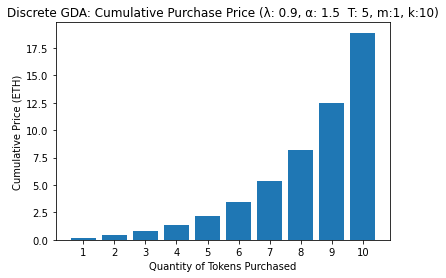

In [4]:
gda = ExponentialDiscreteGDA(initial_price=10, decay_constant=.9, scale_factor=1.5)
plot_discrete_gda(gda, num_total_purchases=1, time_since_start=5) 

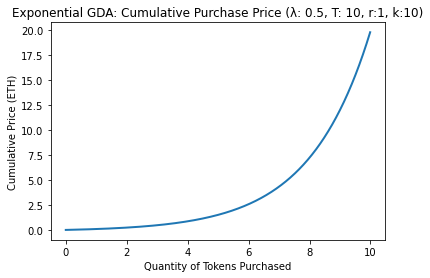

In [12]:
initial_price = 10
decay_constant = 0.5
emission_rate = 1
age_last_available_auction = 10
title = f'Exponential GDA: Cumulative Purchase Price (λ: {decay_constant}, T: {age_last_available_auction}, r:{emission_rate}, k:{initial_price})'
gda = ExponentialContinuousGDA(price_scale, decay_constant, emission_rate)
plot_continuous_gda(gda, age_last_available_auction, title)